# Learning to play Pong

In [1]:
import MyPong # My PyGame Pong Game 
import MyAgent # My DQN Based Agent
import numpy as np 
import random 
import matplotlib.pyplot as plt
import time

#   DQN Algorith Paramaters 
ACTIONS = 3 # Number of Actions.  Acton istelf is a scalar:  0:stay, 1:Up, 2:Down
STATECOUNT = 5 # Size of State [ PlayerYPos, BallXPos, BallYPos, BallXDirection, BallYDirection] 
TOTAL_GAMETIME = 15000

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


/home/vernwalrahul/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Normalise GameState
def CaptureNormalisedState(PlayerYPos, BallXPos, BallYPos, BallXDirection, BallYDirection):
    gstate = np.zeros([STATECOUNT])
    gstate[0] = PlayerYPos/400.0	# Normalised PlayerYPos
    gstate[1] = BallXPos/400.0	# Normalised BallXPos
    gstate[2] = BallYPos/400.0	# Normalised BallYPos
    gstate[3] = BallXDirection/1.0	# Normalised BallXDirection
    gstate[4] = BallYDirection/1.0	# Normalised BallYDirection

    return gstate

In [4]:
# Main Experiment Method 
def PlayExperiment():
    GameTime = 0
    GameHistory = []
    TheGame = MyPong.PongGame()
    
    # Initialise Game
    TheGame.InitialDisplay()
    #
    #  Create our Agent (including DQN based Brain)
    TheAgent = MyAgent.Agent(STATECOUNT, ACTIONS)

    # Initialise NextAction  Assume Action is scalar:  0:stay, 1:Up, 2:Down
    BestAction = 0

    # Initialise current Game State ~ Believe insigificant: (PlayerYPos, BallXPos, BallYPos, BallXDirection, BallYDirection)
    GameState = CaptureNormalisedState(200.0, 200.0, 200.0, 1.0, 1.0)

    #Main Experiment Loop 
    t1 = time.time()
    for gtime in range(TOTAL_GAMETIME):    

        # First just Update the Game Display
        if GameTime % 100 == 0:
            TheGame.UpdateGameDisplay(GameTime,TheAgent.epsilon)

        # Determine Next Action From the Agent
        BestAction = TheAgent.Act(GameState)

        #  Now Apply the Recommended Action into the Game 	
        [ReturnScore,PlayerYPos, BallXPos, BallYPos, BallXDirection, BallYDirection]= TheGame.PlayNextMove(BestAction)
        NextState = CaptureNormalisedState(PlayerYPos, BallXPos, BallYPos, BallXDirection, BallYDirection)

        # Capture the Sample [S, A, R, S"] in Agent Experience Replay Memory 
        TheAgent.CaptureSample((GameState,BestAction,ReturnScore,NextState))

        #  Now Request Agent to DQN Train process  Against Experience
        TheAgent.Process()

        # Move State On
        GameState = NextState

        # Move GameTime Click
        GameTime = GameTime+1

        #print our where wer are after saving where we are
        if GameTime % 1000 == 0:
            # Save the Keras Model
            donothing =0

        if GameTime % 200 == 0:
            print("Game Time: ", GameTime,"  Game Score: ", "{0:.2f}".format(TheGame.GScore), "   EPSILON: ", "{0:.4f}".format(TheAgent.epsilon))
            GameHistory.append((GameTime,TheGame.GScore,TheAgent.epsilon))
        t2 = time.time()
        # print("time = ",t2-t1)
        t1 = t2	

    # ===============================================
    # End of Game Loop  so Plot the Score vs Game Time profile
    x_val = [x[0] for x in GameHistory]
    y_val = [x[1] for x in GameHistory]

    plt.plot(x_val,y_val)
    plt.xlabel("Game Time")
    plt.ylabel("Score")
    plt.show()

Game Time:  200   Game Score:  -9.10    EPSILON:  1.0000
Game Time:  400   Game Score:  -8.39    EPSILON:  1.0000
Game Time:  600   Game Score:  -6.10    EPSILON:  1.0000
Game Time:  800   Game Score:  -6.23    EPSILON:  0.9765
Game Time:  1000   Game Score:  -7.23    EPSILON:  0.8884
Game Time:  1200   Game Score:  -6.00    EPSILON:  0.8086
Game Time:  1400   Game Score:  -5.20    EPSILON:  0.7364
Game Time:  1600   Game Score:  -6.47    EPSILON:  0.6711
Game Time:  1800   Game Score:  -6.46    EPSILON:  0.6120
Game Time:  2000   Game Score:  -5.63    EPSILON:  0.5585
Game Time:  2200   Game Score:  -6.79    EPSILON:  0.5101
Game Time:  2400   Game Score:  -6.74    EPSILON:  0.4663
Game Time:  2600   Game Score:  -5.93    EPSILON:  0.4267
Game Time:  2800   Game Score:  -4.20    EPSILON:  0.3909
Game Time:  3000   Game Score:  -3.93    EPSILON:  0.3584
Game Time:  3200   Game Score:  -4.63    EPSILON:  0.3291
Game Time:  3400   Game Score:  -4.47    EPSILON:  0.3025
Game Time:  3600  

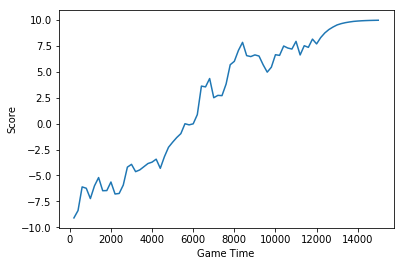

In [5]:
PlayExperiment()